# Simple Linear Regression - Salary hike vs Experience

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
sal_data = pd.read_csv("Salary_Data.csv")

In [4]:
sal_data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [5]:
y = sal_data.Salary
x1 = sal_data.YearsExperience

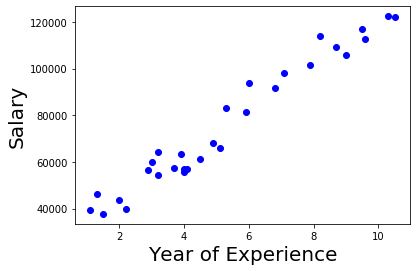

In [6]:
plt.plot(x1,y,'bo')
plt.xlabel('Year of Experience',fontsize=20)
plt.ylabel('Salary',fontsize=20)
plt.show()

In [7]:
y.corr(x1) #correlation co-efficient 

0.9782416184887598

In [8]:
x = sm.add_constant(x1)
result = sm.OLS(y,x).fit()
result.summary()

C:\Users\ABHAY\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Fri, 19 Mar 2021   Prob (F-statistic):           1.14e-20
Time:                        22:08:34   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
y.corr(np.log(x1)) # log transformation on x1 - YoExp 

0.924061081788264

In [10]:
np.log(y).corr(x1) # log transformation on y - salary

0.9653844412504377

In [11]:
np.log(y).corr(np.log(x1))  # log tansformation on both variables 

0.9514279124461897

### By looking at above correlation values of transformed variable it is clear that 
### corellation value is more satisying for untransformed variable and also R-square is more satisfying

In [12]:
pred_val = result.predict(x)

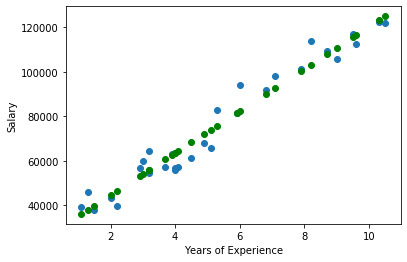

In [13]:
plt.scatter(x1,y)
plt.plot(x1,pred_val,'go')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [14]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y,pred_val))
print("RMSE for result model : {}".format(rmse))

RMSE for result model : 5592.043608760661


### We will consider linear result model as R-squared value is more satisfying!!
### So final equation for our model is as below

## Salary_hike = 2.579e+04 + 9449.96(Year_of_experience)